In [1]:
import pandas as pd
df = pd.read_csv('/content/insurance.csv')
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [2]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

##conclusion
categorical data : sex,smoker,region
numerical data : bmi, age,children,charges
decision : drop duplicates


##DA questions
1)smokers'percentage[female & male]
2)age & bmi corr
3)the highest charges percentage & smokers & children

In [3]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [4]:
print(f"male percentage : {(675/(675+662))*100 }%")
print(f"female percentage : {(662/(675+662))*100}%")

male percentage : 50.48616305160808%
female percentage : 49.51383694839192%


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

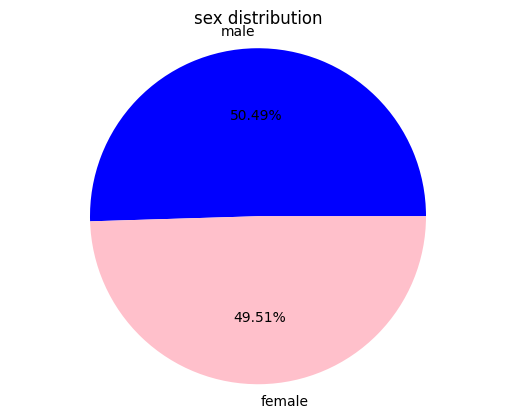

In [6]:
labels = ['male' , 'female']
size = df['sex'].value_counts().values
colors = ['Blue','Pink']
plt.pie(size,labels =labels, colors =colors ,autopct='%.2f%%')
plt.axis('equal')
plt.title('sex distribution')
plt.show()

In [ ]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

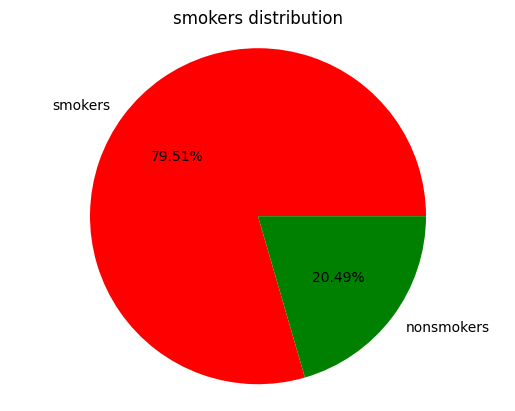

In [7]:
labels = ['smokers' , 'nonsmokers']
size = df['smoker'].value_counts().values
colors = ['Red','Green']
plt.pie(size,labels =labels, colors =colors ,autopct='%.2f%%')
plt.axis('equal')
plt.title('smokers distribution')
plt.show()

In [8]:
df_Sex_male = df[df["sex"]=="male"]
df_Sex_male.smoker.value_counts()

smoker
no     516
yes    159
Name: count, dtype: int64

In [9]:
df_Sex_male = df[df["sex"]=="female"]
df_Sex_male.smoker.value_counts()

smoker
no     547
yes    115
Name: count, dtype: int64

In [10]:
df['children'].value_counts()

children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [ ]:
df['children'].max()

5

In [11]:
df['charges'].value_counts()

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [12]:
df['charges'].max()

63770.42801

In [13]:
df[df["charges"] == df["charges"].max()]["smoker"].iloc[0]

'yes'

In [ ]:
df[df["charges"] == df["charges"].max()]["children"].iloc[0]

0

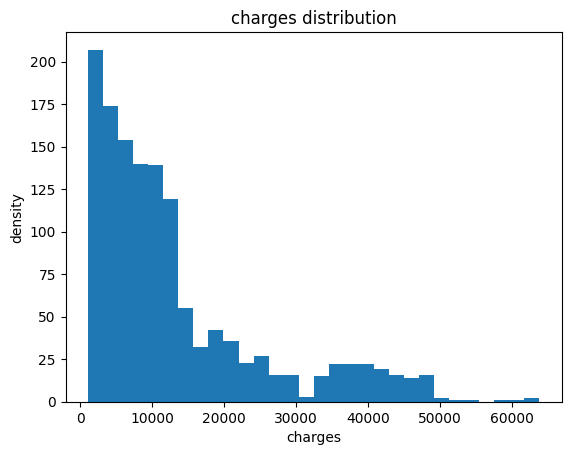

In [14]:
plt.hist(data=df,x='charges',bins=30)
plt.title('charges distribution')
plt.xlabel('charges')
plt.ylabel('density')
plt.show()

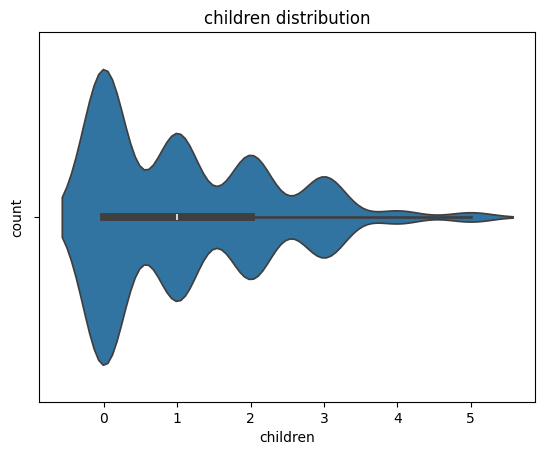

In [15]:
sns.violinplot(data=df,x='children')
plt.title('children distribution')
plt.xlabel('children')
plt.ylabel('count')
plt.show()

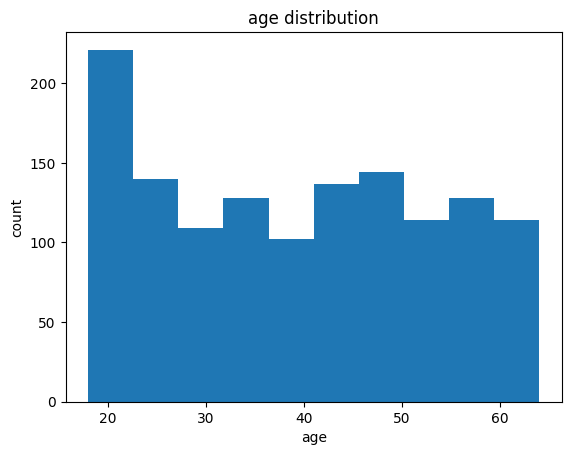

In [16]:
plt.hist(data=df,x='age')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

#converting categorical data into numerical


In [17]:

sex_dic = {'male':0,'female':1}
df['sex'] = df['sex'].map(sex_dic)
df.head()

age  sex     bmi  children smoker     region      charges
0   19    1  27.900         0    yes  southwest  16884.92400
1   18    0  33.770         1     no  southeast   1725.55230
2   28    0  33.000         3     no  southeast   4449.46200
3   33    0  22.705         0     no  northwest  21984.47061
4   32    0  28.880         0     no  northwest   3866.85520

In [18]:
smk_dic = {'yes' : 0 ,'no' : 1}
df['smoker'] = df['smoker'].map(smk_dic)
df.head()

age  sex     bmi  children  smoker     region      charges
0   19    1  27.900         0       0  southwest  16884.92400
1   18    0  33.770         1       1  southeast   1725.55230
2   28    0  33.000         3       1  southeast   4449.46200
3   33    0  22.705         0       1  northwest  21984.47061
4   32    0  28.880         0       1  northwest   3866.85520

In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

categorical_column = "region"

# Fit and transform the categorical column
one_hot_encoded = encoder.fit_transform(df[[categorical_column]])

# Create a DataFrame with the encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out([categorical_column]))

# Concatenate the one-hot encoded columns with the original DataFrame
df1 = pd.concat([df.drop(categorical_column, axis=1), one_hot_df], axis=1)

# Print the result
print(f"One-Hot Encoded Data using Scikit-Learn:\n{df1.head()}\n")


One-Hot Encoded Data using Scikit-Learn:
    age  sex     bmi  children  smoker      charges  region_northeast  \
0  19.0  1.0  27.900       0.0     0.0  16884.92400               0.0   
1  18.0  0.0  33.770       1.0     1.0   1725.55230               0.0   
2  28.0  0.0  33.000       3.0     1.0   4449.46200               0.0   
3  33.0  0.0  22.705       0.0     1.0  21984.47061               0.0   
4  32.0  0.0  28.880       0.0     1.0   3866.85520               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0  



In [22]:
df1.head()

age  sex     bmi  children  smoker      charges  region_northeast  \
0  19.0  1.0  27.900       0.0     0.0  16884.92400               0.0   
1  18.0  0.0  33.770       1.0     1.0   1725.55230               0.0   
2  28.0  0.0  33.000       3.0     1.0   4449.46200               0.0   
3  33.0  0.0  22.705       0.0     1.0  21984.47061               0.0   
4  32.0  0.0  28.880       0.0     1.0   3866.85520               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0               0.0  
2               0.0               1.0               0.0  
3               1.0               0.0               0.0  
4               1.0               0.0               0.0

In [23]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [24]:
df1.to_csv('insurance_new.csv',index=False)